In [94]:
import sys

import os
os.getcwd()
sys.path.append("..")
os.chdir("..")  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

In [95]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

In [96]:
import warnings
 

# Display settings
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
from src.load_data import load_data


In [98]:
base_path = "D:/ds-toolkit/DS-toolkit/data/raw/"
train_path = base_path + "train.csv"
stores_path = base_path + "stores.csv"
oil_path = base_path + "oil.csv"
holidays_path = base_path + "holidays_events.csv"
test_path = base_path + "test.csv"
sample_path = base_path +"sample_submission.csv"

In [99]:
train = pd.read_csv(train_path, parse_dates=['date'])
stores = pd.read_csv(stores_path)
oil = pd.read_csv(oil_path, parse_dates=['date'])
holidays = pd.read_csv(holidays_path, parse_dates=['date'])
test = pd.read_csv(test_path , parse_dates=['date'])
sample_submission = pd.read_csv(sample_path)


In [100]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Check Shapes and Columns

In [101]:

print("Test:", test.shape, test.columns.tolist())
print("Stores:", stores.shape, stores.columns.tolist())
print("Oil:", oil.shape, oil.columns.tolist())
print("Holidays:", holidays.shape, holidays.columns.tolist())
print("Sample Submission:", sample_submission.shape)


Test: (28512, 5) ['id', 'date', 'store_nbr', 'family', 'onpromotion']
Stores: (54, 5) ['store_nbr', 'city', 'state', 'type', 'cluster']
Oil: (1218, 2) ['date', 'dcoilwtico']
Holidays: (350, 6) ['date', 'type', 'locale', 'locale_name', 'description', 'transferred']
Sample Submission: (28512, 2)


In [102]:

print("Train")
print(train.head())

print("\nTest")
print(test.head())

print("\nStores")
print(stores.head())

print("\nOil")
print(oil.head())

print("\nHolidays")
print(holidays.head())

print("\nSample Submission")
print(sample_submission.head())


Train
   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

Test
        id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0

Stores
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       

missing values

In [103]:
 
print("Missing Values:")
for df_name, df in zip(['train', 'test', 'stores', 'oil', 'holidays'], [train, test, stores, oil, holidays]):
    print(f"{df_name}:")
    print(df.isnull().mean().round(4) * 100)
    print()


Missing Values:
train:
id             0.0
date           0.0
store_nbr      0.0
family         0.0
sales          0.0
onpromotion    0.0
dtype: float64

test:
id             0.0
date           0.0
store_nbr      0.0
family         0.0
onpromotion    0.0
dtype: float64

stores:
store_nbr    0.0
city         0.0
state        0.0
type         0.0
cluster      0.0
dtype: float64

oil:
date          0.00
dcoilwtico    3.53
dtype: float64

holidays:
date           0.0
type           0.0
locale         0.0
locale_name    0.0
description    0.0
transferred    0.0
dtype: float64



Data Ranges 

In [104]:
print("Train Date Range:", train['date'].min(), "to", train['date'].max())
print("Test Date Range:", test['date'].min(), "to", test['date'].max())
print("Oil Date Range:", oil['date'].min(), "to", oil['date'].max())
print("Holidays Date Range:", holidays['date'].min(), "to", holidays['date'].max())


Train Date Range: 2013-01-01 00:00:00 to 2017-08-15 00:00:00
Test Date Range: 2017-08-16 00:00:00 to 2017-08-31 00:00:00
Oil Date Range: 2013-01-01 00:00:00 to 2017-08-31 00:00:00
Holidays Date Range: 2012-03-02 00:00:00 to 2017-12-26 00:00:00


EDAs

In [105]:
#train = train.merge(stores, on='store_nbr', how='left')

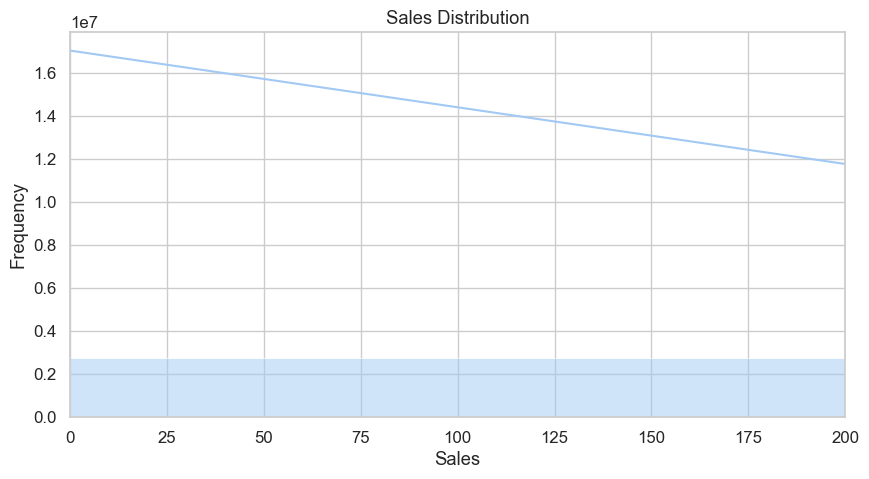

In [106]:

# Histogram of sales
plt.figure(figsize=(10, 5))
sns.histplot(train['sales'], bins=100, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.xlim(0, 200)  
plt.show()

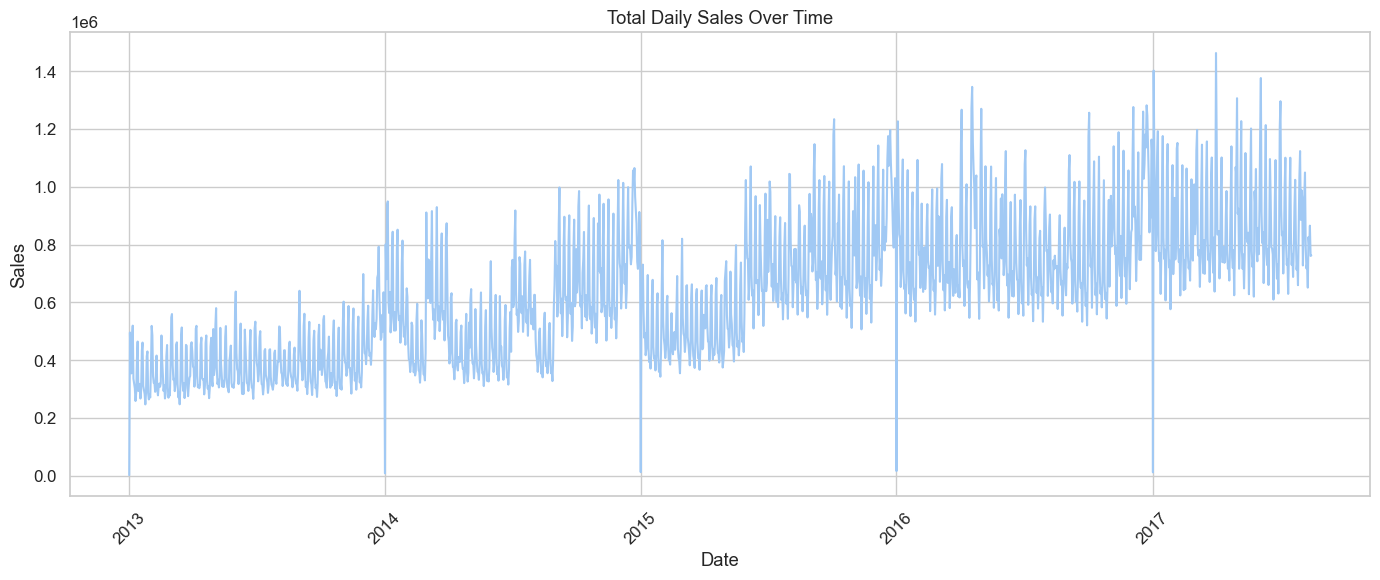

In [107]:
# Daily total sales trend
daily_sales = train.groupby('date')['sales'].sum().reset_index()
plt.figure()
sns.lineplot(data=daily_sales, x='date', y='sales')
plt.title("Total Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

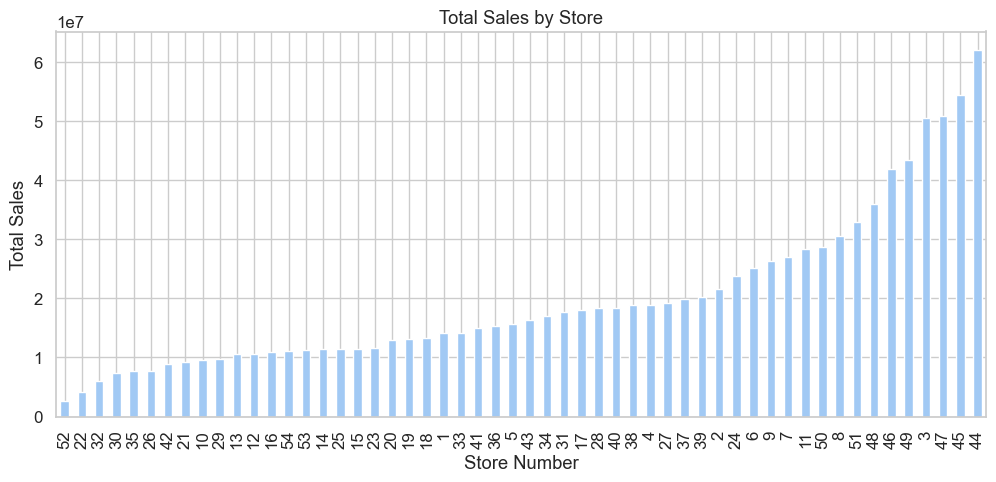

In [108]:
#Compare performance of each store.
plt.figure(figsize=(12, 5))
train.groupby('store_nbr')['sales'].sum().sort_values().plot(kind='bar')
plt.title('Total Sales by Store')
plt.ylabel('Total Sales')
plt.xlabel('Store Number')
plt.show()


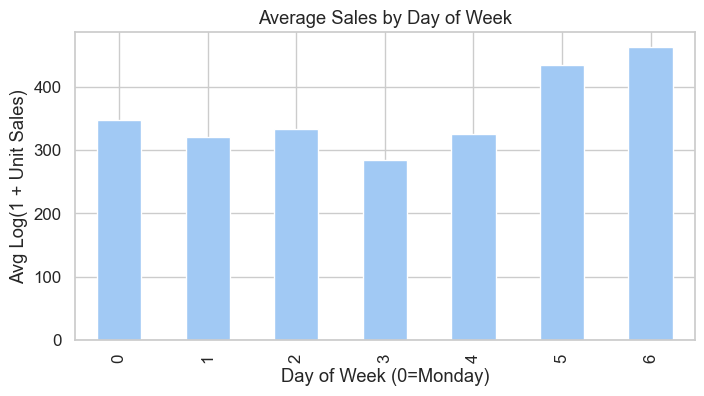

In [109]:
# Sales by day of week
train['dayofweek'] = train['date'].dt.dayofweek
plt.figure(figsize=(8, 4))
train.groupby('dayofweek')['sales'].mean().plot(kind='bar')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Avg Log(1 + Unit Sales)')
plt.show()


Sunday shopping is big in Ecuador, possibly due to:

People having more free time on weekends.

Weekly or bi-weekly restocking behavior.

Some stores may offer special promotions on Sundays.

Families shop together, which can boost basket size.

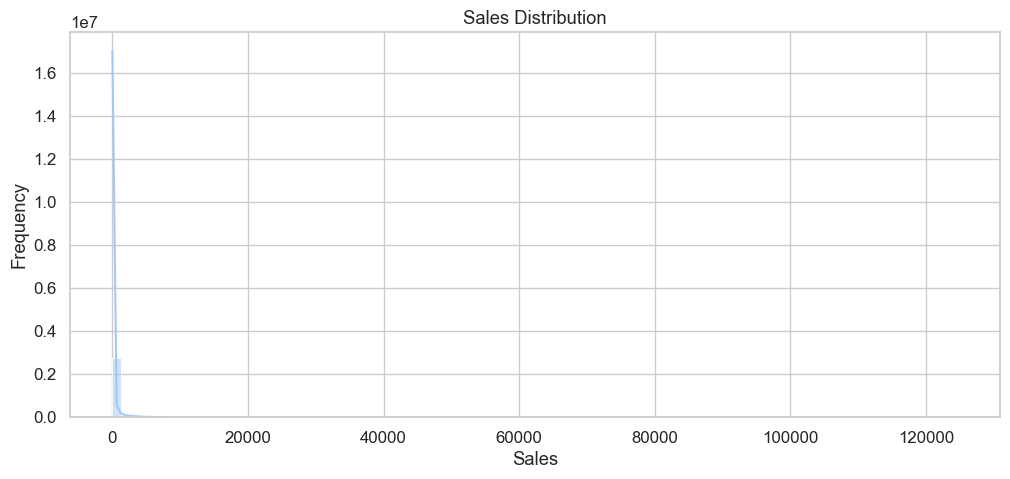

In [110]:
# Sales distribution
plt.figure(figsize=(12,5))
sns.histplot(train['sales'], bins=100, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [111]:
fractional_sales = train[train['sales'] % 1 != 0]
print(f"Fractional sales count: {len(fractional_sales)}")
fractional_sales.head()

Fractional sales count: 462113


,id,date,store_nbr,family,sales,onpromotion,dayofweek
566,566,2013-01-01,25,BREAD/BAKERY,180.589000,0,1
570,570,2013-01-01,25,DELI,71.090000,0,1
572,572,2013-01-01,25,FROZEN FOODS,29.654999,0,1
585,585,2013-01-01,25,MEATS,110.801000,0,1
589,589,2013-01-01,25,POULTRY,42.637000,0,1
